# Import Libraries

In [1]:
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

# Downloading pretrained model from Google

In [2]:
IMAGE_SHAPE=(224,224)
classifier=tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4',input_shape=IMAGE_SHAPE+(3,))
])

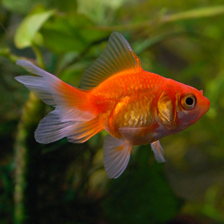

In [3]:
gold_fish=Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [4]:
gold_fish=np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [5]:
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [6]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

# Predicting Goldfish using the downloaded model

In [7]:
result=classifier.predict(gold_fish[np.newaxis,...])

1/1 [==============================] - 5s 5s/step


In [8]:
result.shape

(1, 1001)

In [9]:
predicted_label_index=np.argmax(result)
predicted_label_index

2

In [10]:
with open('ImageNetLabels.txt','r') as f:
    image_labels=f.read().splitlines()

In [11]:
image_labels[2]

'goldfish'

# Downloading Data

In [12]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [13]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [14]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [15]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
X=np.array(X)
y=np.array(y)

# Splitting data into train and test datasets

In [18]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0,)


# Scaling Datasets

In [19]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [20]:
X_train_scaled[0]

array([[[0.27843137, 0.3254902 , 0.31764706],
        [0.24705882, 0.28235294, 0.2627451 ],
        [0.25490196, 0.27058824, 0.24705882],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.23137255, 0.25882353, 0.25490196],
        [0.23137255, 0.25490196, 0.23529412],
        [0.25490196, 0.2627451 , 0.23921569],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.21960784, 0.22352941, 0.21960784],
        [0.23921569, 0.24313725, 0.22745098],
        [0.25098039, 0.25098039, 0.22745098],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16470588, 0.15294118]],

       ...,

       [[0.19215686, 0.49803922, 0.37647059],
        [0.14901961, 0.2627451 , 0.19607843],
        [0.20392157, 0

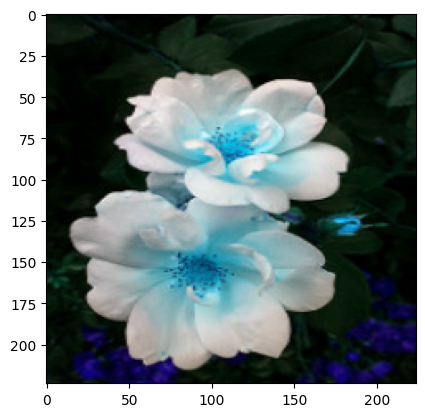

In [21]:
plt.imshow(X[0])

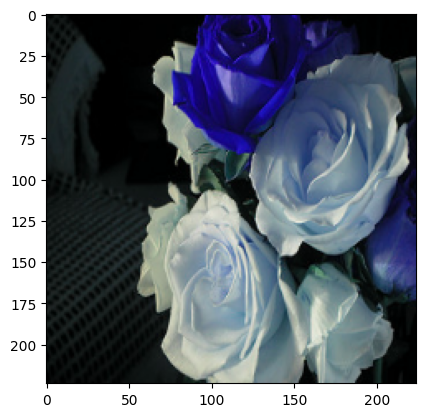

In [22]:
plt.imshow(X[1])

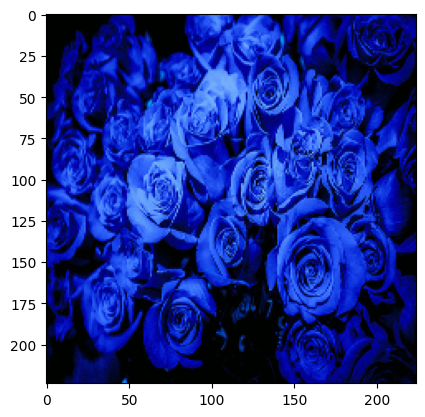

In [23]:
plt.imshow(X[2])

# Downloaded model making wrong predictions

In [24]:
predicted=classifier.predict(np.array([X[0],X[1],X[2]]))
predicted=np.argmax(predicted,axis=1)
predicted

1/1 [==============================] - 2s 2s/step


array([795, 880, 795], dtype=int64)

In [25]:
image_labels[795]

'shower curtain'

In [26]:
image_labels[880]

'umbrella'

# Transfer Learning

# Downloading vector of the model

In [27]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

# Training model using our dataset as the last layer of the vector

In [28]:
num_of_flowers=5

model=tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


# Using Data Generator

In [29]:
from tensorflow.keras.utils import Sequence
import numpy as np   

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

train_gen = DataGenerator(X_train_scaled, y_train, 32)
test_gen = DataGenerator(X_test_scaled, y_test, 32)

In [30]:
len(X_train_scaled)

2752

In [31]:
len(train_gen),len(test_gen)

(86, 29)

In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(train_gen,epochs=32,validation_data=test_gen)

Epoch 1/32
86/86 [==============================] - 17s 179ms/step - loss: 0.2117 - accuracy: 0.9313 - val_loss: 0.3740 - val_accuracy: 0.8693
Epoch 2/32
86/86 [==============================] - 14s 166ms/step - loss: 0.1789 - accuracy: 0.9513 - val_loss: 0.3669 - val_accuracy: 0.8638
Epoch 3/32
86/86 [==============================] - 13s 153ms/step - loss: 0.1532 - accuracy: 0.9608 - val_loss: 0.3464 - val_accuracy: 0.8725
Epoch 4/32
86/86 [==============================] - 12s 135ms/step - loss: 0.1316 - accuracy: 0.9669 - val_loss: 0.3475 - val_accuracy: 0.8747
Epoch 5/32
86/86 [==============================] - 11s 133ms/step - loss: 0.1200 - accuracy: 0.9717 - val_loss: 0.3485 - val_accuracy: 0.8802
Epoch 6/32
86/86 [==============================] - 11s 129ms/step - loss: 0.1026 - accuracy: 0.9818 - val_loss: 0.3499 - val_accuracy: 0.8791
Epoch 7/32
86/86 [==============================] - 11s 125ms/step - loss: 0.0902 - accuracy: 0.9862 - val_loss: 0.3555 - val_accuracy: 0.8780

In [35]:
model.evaluate(test_gen)

29/29 [==============================] - 2s 57ms/step - loss: 0.4270 - accuracy: 0.8725


[0.4270114302635193, 0.8725489974021912]